## 使用Keres MNIST Fashion辨識穿著

In [90]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [91]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape,y_test.shape,x_test.shape,y_test.shape

((60000, 28, 28), (10000,), (10000, 28, 28), (10000,))

In [92]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [93]:
y_train[:20]
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

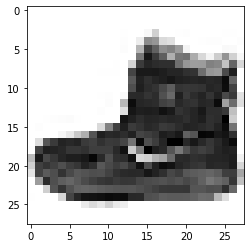

In [94]:
img = x_train[0].reshape(28, 28)
plt.imshow(img, cmap='Greys')

In [95]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image

['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]',
 '[0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]',
 '[0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]',
 '[0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]',
 '[0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]',
 '[0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]',
 '[0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]',
 '[0 0 0

In [96]:
data.shape[0]

28

In [97]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000000100，即第8個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

In [98]:
# 將 training 的 input 資料轉為2維
x_train_2D = x_train.reshape(len(x_train), 28*28).astype('float32')  
x_test_2D = x_test.reshape(len(x_test), 28*28).astype('float32') 

In [99]:
x_Train_norm = x_train_2D/255
x_Test_norm = x_test_2D/255

In [100]:
# 建立簡單的線性執行的模型
model = tf.keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 320個輸出變數
model.add(tf.keras.layers.Dense(units=320, input_dim=784, kernel_initializer='normal', activation='relu')) 
model.add(tf.keras.layers.Dense(units=64, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(tf.keras.layers.Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [101]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                20544     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 272,394
Trainable params: 272,394
Non-trainable params: 0
_________________________________________________________________


In [102]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=1000, verbose=2)  

Epoch 1/10
48/48 - 3s - loss: 1.0287 - accuracy: 0.6640 - val_loss: 0.5853 - val_accuracy: 0.7947
Epoch 2/10
48/48 - 3s - loss: 0.5292 - accuracy: 0.8135 - val_loss: 0.4947 - val_accuracy: 0.8263
Epoch 3/10
48/48 - 3s - loss: 0.4575 - accuracy: 0.8408 - val_loss: 0.4497 - val_accuracy: 0.8454
Epoch 4/10
48/48 - 2s - loss: 0.4160 - accuracy: 0.8546 - val_loss: 0.4161 - val_accuracy: 0.8522
Epoch 5/10
48/48 - 3s - loss: 0.3922 - accuracy: 0.8628 - val_loss: 0.4109 - val_accuracy: 0.8542
Epoch 6/10
48/48 - 2s - loss: 0.3721 - accuracy: 0.8698 - val_loss: 0.3790 - val_accuracy: 0.8687
Epoch 7/10
48/48 - 3s - loss: 0.3550 - accuracy: 0.8740 - val_loss: 0.3683 - val_accuracy: 0.8691
Epoch 8/10
48/48 - 3s - loss: 0.3388 - accuracy: 0.8800 - val_loss: 0.3606 - val_accuracy: 0.8731
Epoch 9/10
48/48 - 2s - loss: 0.3273 - accuracy: 0.8837 - val_loss: 0.3694 - val_accuracy: 0.8674
Epoch 10/10
48/48 - 2s - loss: 0.3162 - accuracy: 0.8874 - val_loss: 0.3397 - val_accuracy: 0.8777


In [103]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print(f"準確度 = {scores[1]*100.0:2.1f}")  

313/313 [==============================] - 1s 3ms/step - loss: 0.3695 - accuracy: 0.8689
準確度 = 86.9


In [104]:
#存模型
model.save('20200929fashion_mnist_keras.h5')

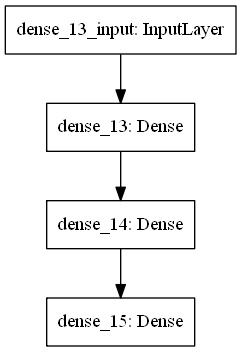

In [105]:
#繪製模型
tf.keras.utils.plot_model(model, to_file='model.png')